In [1]:
#Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
# Train data loading
X_train = np.load('E:\whistle_identification\TrainAndVal_vanilla\\trainImages_vanilla_48kHz.npy',allow_pickle=True)
y_train = np.load('E:\whistle_identification\TrainAndVal_vanilla\\trainLabels_vanilla_48kHz.npy',allow_pickle=True)
X_val = np.load('E:\whistle_identification\TrainAndVal_vanilla\\valImages_vanilla_48kHz.npy',allow_pickle=True)
y_val = np.load('E:\whistle_identification\TrainAndVal_vanilla\\valLabels_vanilla_48kHz.npy',allow_pickle=True)


In [14]:
# Model definition
print('Definizione modello...')
model = Sequential()

# Adding Convolutional and Max Pooling Layers
model.add(Conv2D(32, (7, 7), strides=(2, 2), activation='relu', input_shape=(224,223,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), strides=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Data flattening
model.add(Flatten()) 

# Adding Fully Connected layers
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

Definizione modello...


In [ ]:
# Model build
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

# Model training
history = model.fit(X_train, y_train, epochs = 1, batch_size = 16, validation_data=(X_val,y_val))

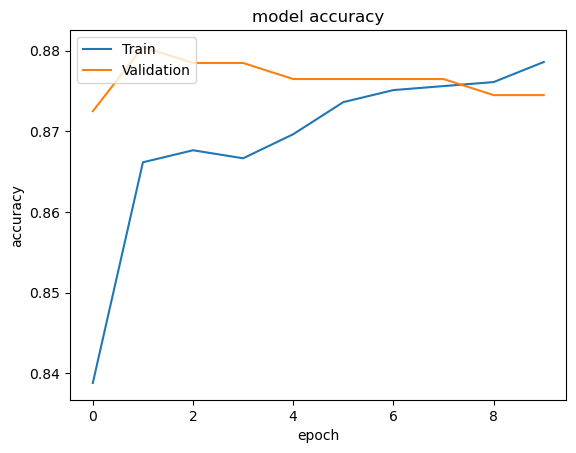

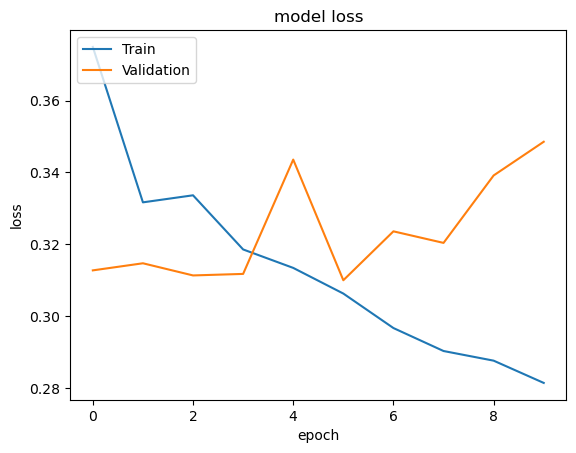

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [8]:
# Saving the trained model
#model.save('E:\whistle_identification\DOLPHI\\vanilla_model_2_48kHz.keras')